In [136]:
import pandas as pd

In [145]:
data1 = pd.read_csv('dataset/GDELT_CNN/results-20190204-133611_1.csv', delimiter=',', encoding='latin-1')
print(data1.shape)
data2 = pd.read_csv('dataset/GDELT_CNN/results-20190204-133707_2.csv', delimiter=',', encoding='latin-1')
print(data2.shape)
data3 = pd.read_csv('dataset/GDELT_CNN/results-20190204-133743_3.csv', delimiter=',', encoding='latin-1')
print(data3.shape)
data4 = pd.read_csv('dataset/GDELT_CNN/results-20190204-133812_4.csv', delimiter=',', encoding='latin-1')
print(data4.shape)

(5626, 3)
(7580, 3)
(5998, 3)
(7638, 3)


In [146]:
data = pd.concat([data1,data2,data3,data4])
data.shape

(26842, 3)

In [147]:
data.columns = ['url', 'code', 'year']
data.head()

,url,code,year
0,https://www.cnnindonesia.com/gaya-hidup/201803...,10,2018
1,https://www.cnnindonesia.com/nasional/20180301...,10,2018
2,https://www.cnnindonesia.com/hiburan/201803011...,10,2018
3,https://www.cnnindonesia.com/nasional/20180301...,10,2018
4,https://www.cnnindonesia.com/internasional/201...,10,2018


In [148]:
len(data['url'].unique()), len(data['url'])

(11923, 26842)

In [149]:
data = data.drop_duplicates(subset='url', keep='last')
data.shape

(11923, 3)

In [150]:
data = data.sample(frac=1).reset_index(drop=True)
print(data.index)

RangeIndex(start=0, stop=11923, step=1)


In [151]:
eventcode = pd.read_csv('dataset/GDELT_CNN/eventcodes.csv', sep=',')
eventcode.columns = ['code', 'description']
print(eventcode.shape)
eventcode.head(5)

(310, 2)


,code,description
0,1,MAKE PUBLIC STATEMENT
1,10,"Make statement, not specified below"
2,11,Decline comment
3,12,Make pessimistic comment
4,13,Make optimistic comment


In [158]:
data['description'] = ""

for i in range(len(data)):
    for j in range(len(eventcode)):
        if data['code'][i] == eventcode['code'][j]:
            data['description'][i] = eventcode['description'][j]
            
data.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,url,code,year,description
0,https://www.cnnindonesia.com/ekonomi/201807161...,311,2018,Express intent to cooperate economically
1,https://www.cnnindonesia.com:443/nasional/2018...,190,2018,"Use conventional military force, not specified..."
2,https://www.cnnindonesia.com/nasional/20180614...,173,2018,"Arrest, detain, or charge with legal action"
3,https://www.cnnindonesia.com/olahraga/20180528...,111,2018,Criticize or denounce
4,https://www.cnnindonesia.com/nasional/20180505...,90,2018,"Investigate, not specified below"


In [161]:
data['headline'] = ""

for i in range(len(data)):
    data['headline'][i] = data['url'][i].split('/')[-1].replace('-',' ').lower()
    
data.sample(5)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,url,code,year,description,headline
6695,https://www.cnnindonesia.com/internasional/201...,112,2018,"Accuse, not specified below",putin sebut kasus racun di inggris tak masuk akal
7245,https://www.cnnindonesia.com/internasional/201...,180,2018,"Use unconventional violence, not specified below",rusia ke inggris soal serangan racun kalian ak...
3057,https://www.cnnindonesia.com/internasional/201...,10,2018,DEMAND,vatikan tegaskan larangan hukuman mati tanpa t...
2044,https://www.cnnindonesia.com/internasional/201...,84,2018,"Return, release, not specified below",dubes ri di korea sebut indonesia magnet digit...
7883,https://www.cnnindonesia.com/gaya-hidup/201802...,61,2018,Cooperate economically,berkunjung ke pabrik bir ramah lingkungan di j...


In [163]:
# stopwords

stopwords = pd.read_csv('dataset/indonesian-stopwords-complete.txt', delimiter=' ', header=None)
stopwords.columns = ['words']
print(stopwords.head())

data['headline'] = data['headline'].apply(lambda x: ' '.join([item for item in x.split(' ') if not (stopwords.isin([item]).any().words)]))

    words
0     ada
1  adalah
2  adanya
3  adapun
4    agak


In [164]:
data.head()

,url,code,year,description,headline
0,https://www.cnnindonesia.com/ekonomi/201807161...,311,2018,Express intent to cooperate economically,investor berniat beli merpati airlines
1,https://www.cnnindonesia.com:443/nasional/2018...,190,2018,"Use conventional military force, not specified...",tommy soeharto muchdi pr bela pollycarpus gabu...
2,https://www.cnnindonesia.com/nasional/20180614...,173,2018,"Arrest, detain, or charge with legal action",teroris blitar incar target bank gedung pemeri...
3,https://www.cnnindonesia.com/olahraga/20180528...,111,2018,Criticize or denounce,cederai mohamed salah ramos dianggap tukang jagal
4,https://www.cnnindonesia.com/nasional/20180505...,90,2018,"Investigate, not specified below",mengusir kapal tongkang pembunuh terumbu karan...


In [165]:
len(data['code'].value_counts())

150

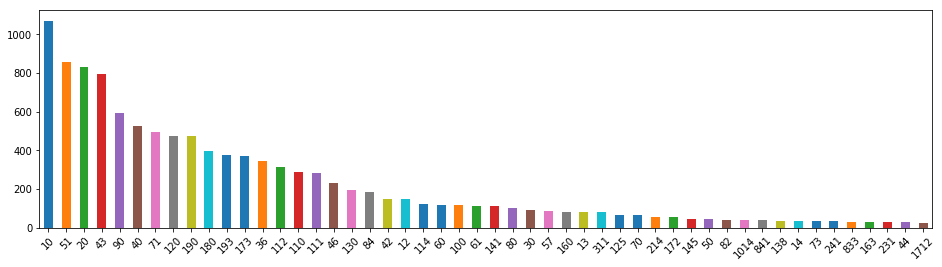

In [166]:
data['code'].value_counts()[:50].plot(kind='bar', figsize=(16,4), rot=45)

In [167]:
# split

from sklearn.utils import shuffle

headline = data['headline'].values
url = data['url'].values
code = data['code'].values
code_desc = data['description'].values

headline, url, code, code_desc = shuffle(headline, url, code, code_desc, random_state=0)

In [168]:
headline

array([u'petugas lapas nakal sukamiskin dimutasi jakarta',
       u'bom guncang myanmar polisi luka luka',
       u'china dampak perang dagang as jangka pendek', ...,
       u'jokowi novel polisi jalan',
       u'presiden jokowi bantuan ciptakan demam asian games',
       u'kbri pencekalan rizieq shihab arab saudi'], dtype=object)

In [169]:
n = 10

X_train_url = url[:-n]
X_train_headline = headline[:-n]
X_train_code_desc = code_desc[:-n]

X_test_url = url[-n:]
X_test_headline = headline[-n:]
X_test_code_desc = code_desc[-n:]

In [170]:
# vectorize 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train_headline)

X_train_tfidf = vectorizer.transform(X_train_headline)
X_test_tfidf = vectorizer.transform(X_test_headline)

In [171]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(11913, 12171)
(10, 12171)


In [172]:
import numpy as np

def get_recommendation(current_article_index, top_n):
    # get tfidf from current article
    test_article = X_test_tfidf[current_article_index]
    
    # get similarity scores
    similarity_scores = X_train_tfidf.dot(test_article.toarray().T)
    
    # get sorted index of similarity scores
    sorted_indices = np.argsort(similarity_scores, axis=0)[::-1]
    
    # get sorted similarity scores
    # sorted_sim_scores = similarity_scores[sorted_indices]
    
    # get current article
    current_article = X_test_url[current_article_index].split('/')[-1].replace('-', ' ')
    print('current article:\n%s\n' % (current_article))
    
    # get recommendation
    print('recommended article:')
    top_n_url = X_train_url[sorted_indices[:top_n]]
    top_n_code_desc = X_train_code_desc[sorted_indices[:top_n]]
    
    for i,j in enumerate(top_n_url):
        for k,l in enumerate(top_n_url[i]):
            print('%i: %s' % (i+1,l.split('/')[-1].replace('-',' ')))
            # remove '#' below to add category
            # print('category: %s' % (top_n_code_desc[i][0].lower()))
            # print('------------------------------------------------------')

In [173]:
for i,v in enumerate(X_test_url):
    print('%i: %s' % (i,v.split('/')[-1].replace('-',' ')))

0: 3 ribu personel tni polri amankan doa untuk rizieq di monas
1: neraca perdagangan oktober 2018 defisit us 182 miliar
2: wasit laga kontroversial di piala dunia 2018 dipulangkan
3: anjing shiba inu imut yang jadi magnet turis di kyushu
4: gedung putih dan obama dapat kiriman paket ledakan
5: turki sebut as bertanggungjawab atas bentrokan di gaza
6: pa 212 kami ikuti fatwanya bukan pimpinan mui
7: jokowi tanya kasus novel polisi jalan di tempat
8: presiden jokowi minta bantuan ciptakan demam asian games
9: kbri sebut tak ada pencekalan rizieq shihab di arab saudi


In [175]:
# get_recommendation(news_index_from_X_test_url, number_of_recommendation)
get_recommendation(6, 10)

current article:
pa 212 kami ikuti fatwanya bukan pimpinan mui

recommended article:
1: kritik mui pa 212 nilai umat tak berhak maafkan sukmawati
2: bukan cuma di jabar pa 212 ingin semua kasus rizieq disetop
3: pdip soal pertemuan pa 212 jokowi tidak ada intervensi hukum
4: pa 212 akan perjuangkan rizieq shihab jadi capres
5: pa 212 berencana kembali gelar aksi bela palestina
6: pa 212 tolak ruu dan perppu terorisme
7: siapapun presidennya pa 212 mau tetap jadi parlemen jalanan
8: amien rais sebut tak ada amplop saat jokowi bertemu pa 212
9: pa 212 tantang jokowi pulangkan rizieq shihab sebelum pilpres
10: instagram hapus foto rizieq pa 212 salahkan pemerintah


source: https://towardsdatascience.com/content-based-recommender-for-nyt-articles-5a54f57dd531